In [66]:
import numpy as np
import pandas as pd
import db
import config
import matplotlib.pyplot as plt
from exposuresource import ExposureSource
from astropy.io import fits

In [64]:
config.Config.init('emily_saul.yaml')
decam = ExposureSource.get("DECam/Reduced")

In [57]:
phot = db.Photometry.get_for_obj_and_band('DC21cozcn', 'DECam_r', expsourceid=3)
fluxes = []
for x in phot:
    newflux = x.flux*10**((phot[0].magzp-x.magzp)/2.5)
    fluxes.append(newflux)

In [58]:
phot[0].magzp

30.069

In [47]:
data = pd.DataFrame({'mjd': [x.mjd for x in phot],
                     'flux': fluxes,
                     'fluxerr': [0 for x in phot]
                    })

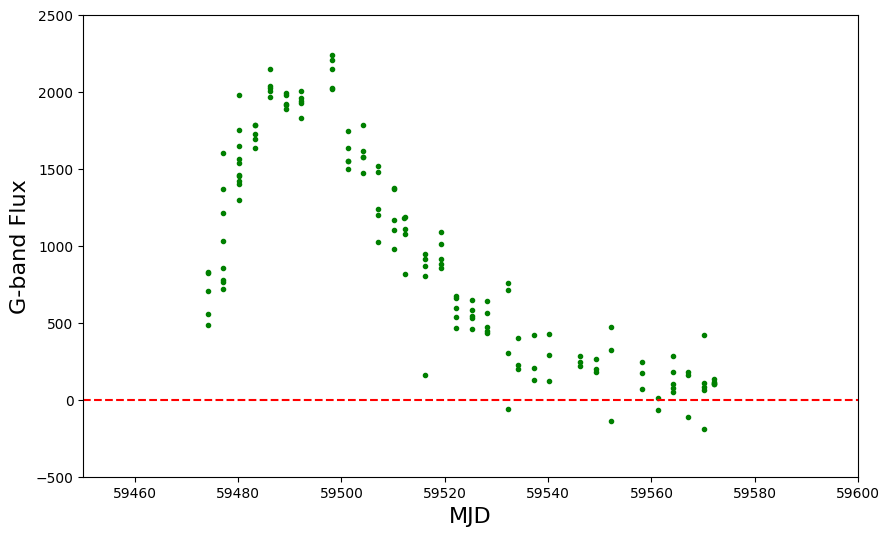

In [51]:
fig, ax = plt.subplots(figsize=[10,6])
ax.plot(data.mjd, data.flux, marker='.', linestyle='', color='g')
ax.set_ylim([-500, 2500])
ax.set_xlim([59450, 59600])
ax.plot([59450, 59600], [0, 0], 'r--')
ax.set_xlabel("MJD", fontsize=16)
ax.set_ylabel("G-band Flux", fontsize=16)
plt.savefig("figs/DC21cozcn_gband_apphot.png", bbox_inches='tight')

In [61]:
obj_name = 'DC21cyddn'
obj = db.Object.get_by_name(obj_name)
img_objs = db.Image.get_including_point(obj.ra, obj.dec)

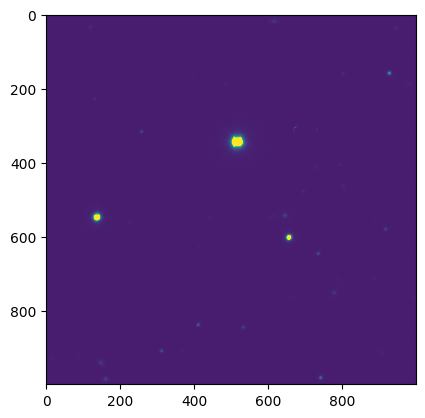

In [86]:
filename = decam.local_path_from_basename(img_objs[150].basename)
with fits.open(filename) as file:
    hdr = file[0].header
    data = file[0].data

In [76]:
data

23193.582

In [74]:
import matplotlib as mpl
mpl.scale.get_scale_names()

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']